In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert skle# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)arn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
28 * 28

784

NameError: name 'save_fig' is not defined

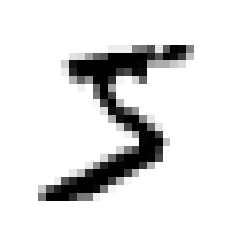

In [21]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [23]:
y[0]

'5'

In [24]:
y = y.astype(np.uint8)

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [ ]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

<Figure size 648x648 with 0 Axes>

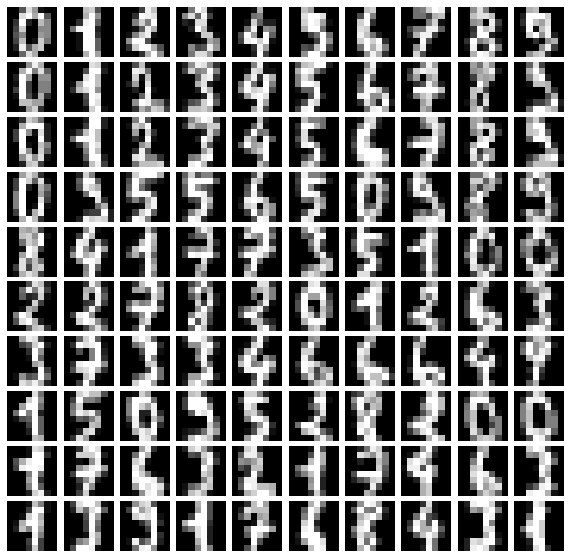

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits  # Example dataset

# Load example dataset
digits = load_digits()
X = digits.images  # Assuming X contains the image data

# Define your plotting function
def plot_digits(images, images_per_row=10):
    """Plots a collection of images in a grid."""
    n_images = len(images)
    n_rows = (n_images // images_per_row) + (n_images % images_per_row > 0)
    fig, axes = plt.subplots(n_rows, images_per_row, figsize=(images_per_row, n_rows))
    axes = axes.ravel()

    for i in range(images_per_row * n_rows):
        if i < n_images:
            axes[i].imshow(images[i], cmap='gray')
            axes[i].axis('off')
        else:
            axes[i].axis('off')  # Hide any unused subplots

    plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Plot example images
plt.figure(figsize=(9, 9))
example_images = X[:100]  # Taking the first 100 images
plot_digits(example_images, images_per_row=10)
plt.show()


In [40]:
y[0]

5

In [41]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris  # example dataset; replace as needed

# Load dataset (replace with your own data if needed)
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best parameters: {grid_search.best_params_}")

# Train the best KNN classifier
best_knn = grid_search.best_estimator_

# Predict on the test set
y_pred_best = best_knn.predict(X_test)

# Evaluate the accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Accuracy: {accuracy_best:.2f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weig

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_rf_clf = grid_search.best_estimator_
y_pred = best_rf_clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

print("Best parameters found: ", best_params)
print("Best cross-validation accuracy: ", best_score)
print("Test set accuracy: ", test_accuracy)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up the parameter grid for Grid Search
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
}

# Initialize the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose= 2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_sgd_clf = grid_search.best_estimator_
y_pred = best_sgd_clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

print("Best parameters found: ", best_params)
print("Best cross-validation accuracy: ", best_score)
print("Test set accuracy: ", test_accuracy)

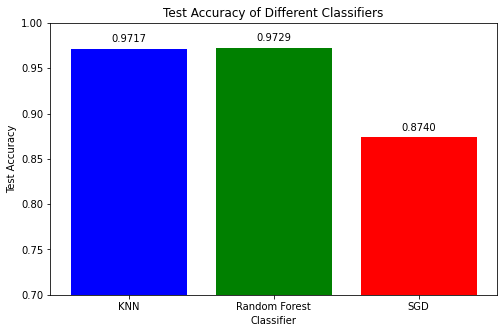

In [4]:
import matplotlib.pyplot as plt

# Test accuracy values
accuracy_values = [0.9717, 0.9729, 0.8740]
classifiers = ['KNN', 'Random Forest', 'SGD']

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(classifiers, accuracy_values, color=['blue', 'green', 'red'])

# Add title and labels
plt.title('Test Accuracy of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Test Accuracy')
plt.ylim(0.7, 1.0)  # Set the y-axis limit for better comparison

# Add accuracy values on top of bars
for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.005, f'{value:.4f}', ha='center', va='bottom')

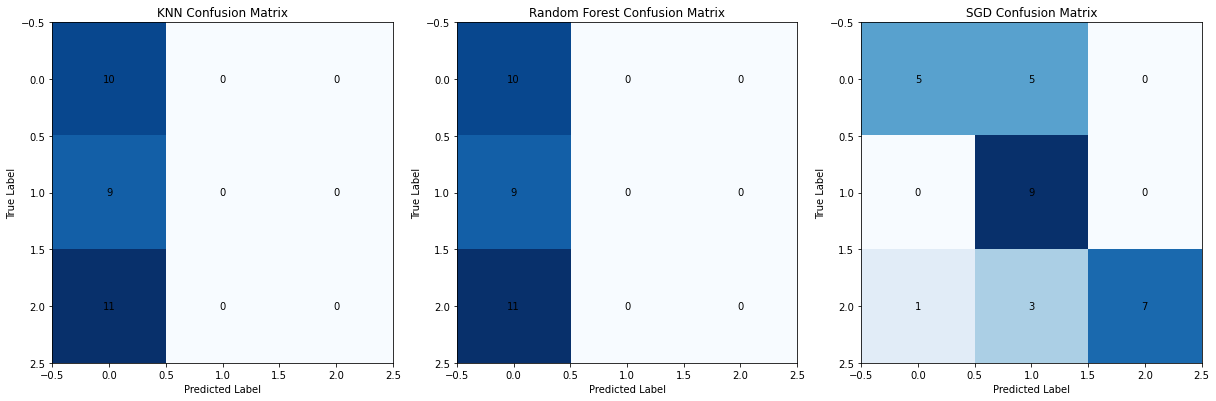

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris  # Example dataset

# Load and split the dataset
data = load_iris()  # Replace with your dataset
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have a KNN grid search object `grid_search`
# Initialize or load your models (replace these with your tuned models if available)
best_knn_clf = grid_search.best_estimator_
best_rf_clf = RandomForestClassifier().fit(X_train, y_train)  # Replace with your tuned RF model
best_sgd_clf = SGDClassifier().fit(X_train, y_train)          # Replace with your tuned SGD model

# Scale the test data
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Make predictions for each classifier
y_pred_knn = best_knn_clf.predict(X_test_scaled)
y_pred_rf = best_rf_clf.predict(X_test_scaled)
y_pred_sgd = best_sgd_clf.predict(X_test_scaled)

# Define classifier names for display
y_preds = [y_pred_knn, y_pred_rf, y_pred_sgd]
classifiers = ['KNN', 'Random Forest', 'SGD']

# Plot confusion matrices using matplotlib only
fig, axs = plt.subplots(1, 3, figsize=(17, 6))

for i, (y_pred, clf_name) in enumerate(zip(y_preds, classifiers)):
    conf_matrix = confusion_matrix(y_test, y_pred)
    axs[i].imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    axs[i].set_title(f'{clf_name} Confusion Matrix')
    axs[i].set_xlabel('Predicted Label')
    axs[i].set_ylabel('True Label')

    # Add text annotations
    for j in range(conf_matrix.shape[0]):
        for k in range(conf_matrix.shape[1]):
            axs[i].text(k, j, conf_matrix[j, k], ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


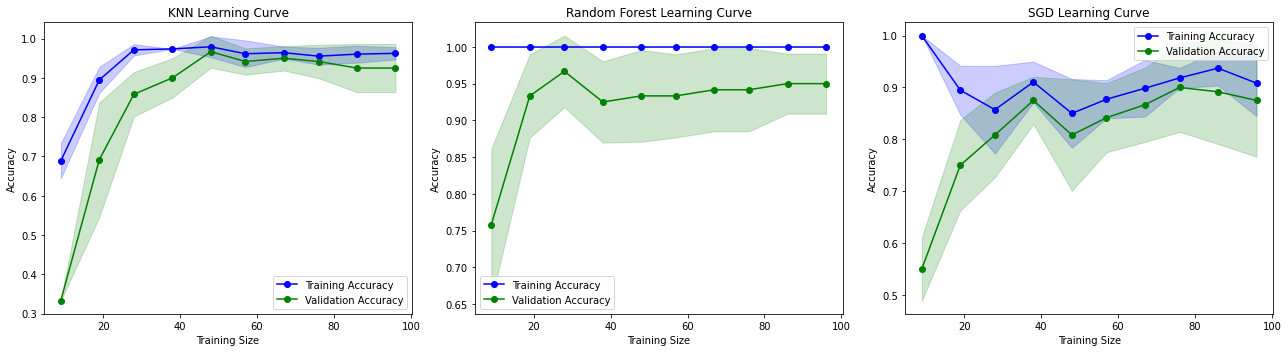

In [31]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, title, X, y, ax=None):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', 
                                                           train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    if ax is None:
        fig, ax = plt.subplots()
        
    ax.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
    ax.plot(train_sizes, val_mean, 'o-', color='green', label='Validation Accuracy')
    
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.2)
    
    ax.set_title(title)
    ax.set_xlabel('Training Size')
    ax.set_ylabel('Accuracy')
    ax.legend()

# Create subplots for learning curves
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot learning curves for KNN, Random Forest, and SGD
plot_learning_curve(best_knn_clf, 'KNN Learning Curve', X_train_scaled, y_train, ax=axs[0])
plot_learning_curve(best_rf_clf, 'Random Forest Learning Curve', X_train_scaled, y_train, ax=axs[1])
plot_learning_curve(best_sgd_clf, 'SGD Learning Curve', X_train_scaled, y_train, ax=axs[2])

plt.tight_layout()
plt.show()